In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import random
from cv2 import resize
from glob import glob

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Correct dataset path based on your provided path
dataset_path = '/content/drive/MyDrive/fault solar/Faulty_solar_panel-20250424T064433Z-001/Faulty_solar_panel'

# List subfolders in the dataset directory
subfolders = sorted(os.listdir(dataset_path))
print("Subfolders (Classes):", subfolders)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/fault solar/Faulty_solar_panel-20250424T064433Z-001/Faulty_solar_panel'

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fault solar.zip to fault solar.zip


In [ ]:
import zipfile

zip_path = 'fault solar.zip'  # New file name

if zipfile.is_zipfile(zip_path):
    print("✅ This is a valid zip file.")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('solar_dataset')
        print("✅ Extracted successfully.")
else:
    print("❌ This is NOT a valid zip file.")


✅ This is a valid zip file.
✅ Extracted successfully.


In [ ]:
data_dir = "/content/solar_dataset/Faulty_solar_panel-20250424T064433Z-001/Faulty_solar_panel"


In [ ]:
import zipfile
import os

# Path to your uploaded zip file
zip_path = "/content/fault solar.zip"
extract_path = "/content/solar_dataset"

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Display extracted structure
for root, dirs, files in os.walk(extract_path):
    print("📁", root)
    for dir in dirs:
        print("   └── 📂", dir)
    for file in files:
        print("   └── 📄", file)


📁 /content/solar_dataset
   └── 📂 Faulty_solar_panel-20250424T064433Z-001
📁 /content/solar_dataset/Faulty_solar_panel-20250424T064433Z-001
   └── 📂 Faulty_solar_panel
📁 /content/solar_dataset/Faulty_solar_panel-20250424T064433Z-001/Faulty_solar_panel
   └── 📂 Clean
   └── 📂 Physical-Damage
   └── 📂 Electrical-damage
   └── 📂 Dusty
   └── 📂 Snow-Covered
   └── 📂 Bird-drop
   └── 📄 .DS_Store
📁 /content/solar_dataset/Faulty_solar_panel-20250424T064433Z-001/Faulty_solar_panel/Clean
   └── 📄 Clean (85).jpg
   └── 📄 Clean (82).jpg
   └── 📄 Clean (30).jpg
   └── 📄 Clean (79).jpg
   └── 📄 Clean (122).jpg
   └── 📄 Clean (88).jpg
   └── 📄 Clean (174).jpg
   └── 📄 Clean (77).jpg
   └── 📄 Clean (153).jpg
   └── 📄 Clean (162).jpg
   └── 📄 Clean (83).jpg
   └── 📄 Clean (180).jpg
   └── 📄 Clean (159).jpg
   └── 📄 Clean (2).jpg
   └── 📄 Clean (5).jpg
   └── 📄 Clean (25).jpg
   └── 📄 Clean (58).jpg
   └── 📄 Clean (105).jpg
   └── 📄 Clean (169).jpg
   └── 📄 Clean (34).jpg
   └── 📄 Clean (70).jpg
   └── 

In [ ]:
img_height = 244
img_width = 244

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=32
)


Found 925 files belonging to 6 classes.
Using 740 files for training.
Found 925 files belonging to 6 classes.
Using 185 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

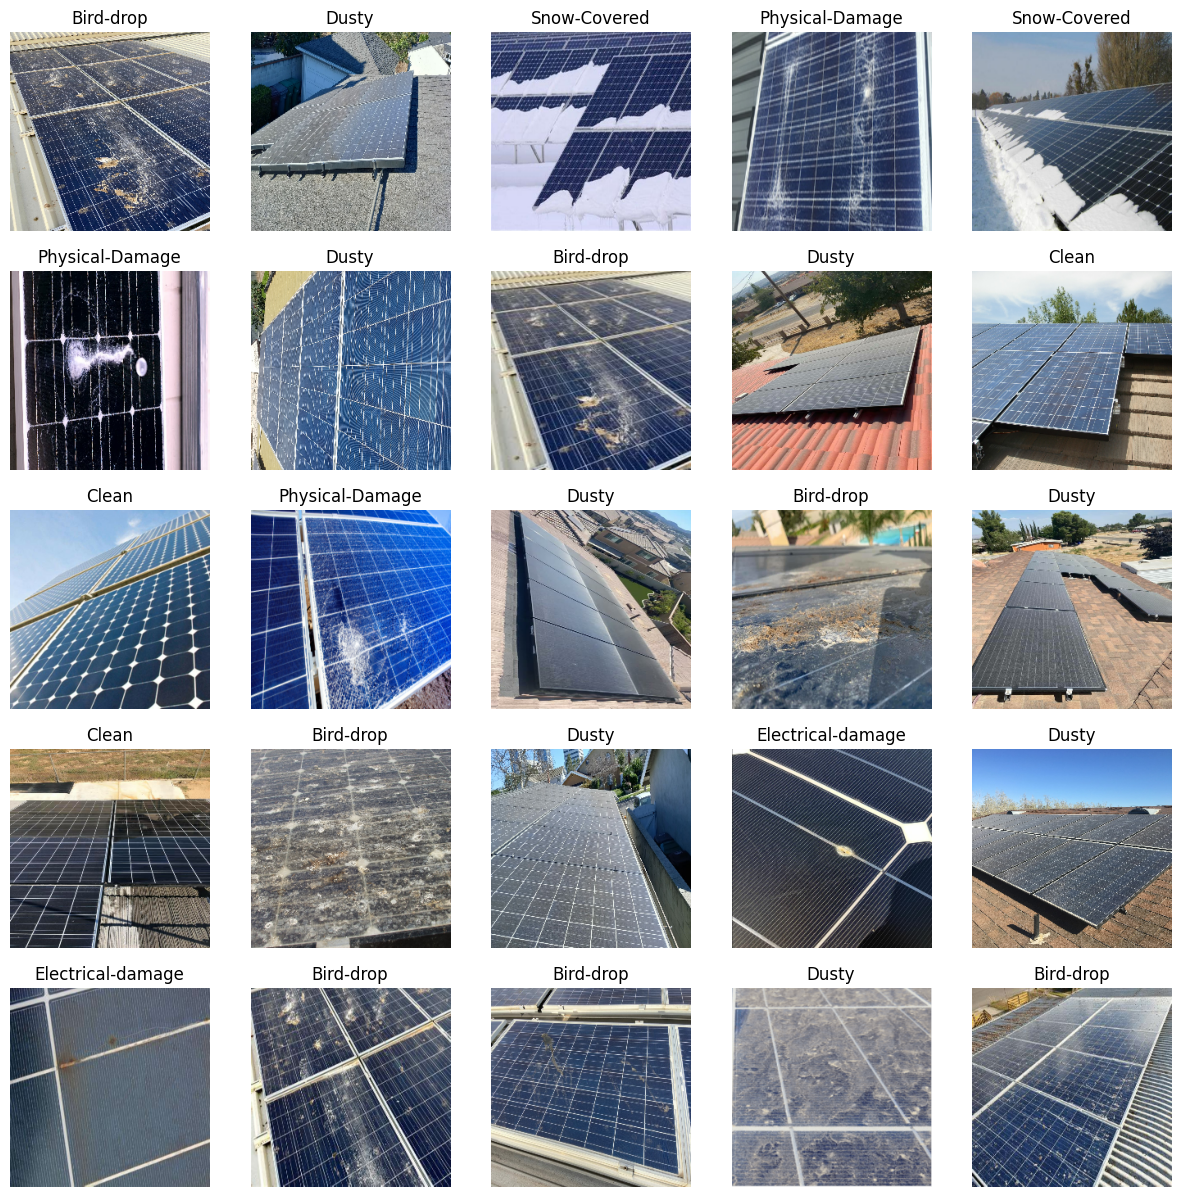

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = tf.keras.applications.vgg16.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(90)(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 244, 244,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 244, 244)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 244, 244)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 244, 244)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 244, 244,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 244, 244,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512)       │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 90)        │     46,170 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,760,858 (56.31 MB)

 Trainable params: 46,170 (180.35 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
pip install pydot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 13.6 MB/s eta 0:00:00


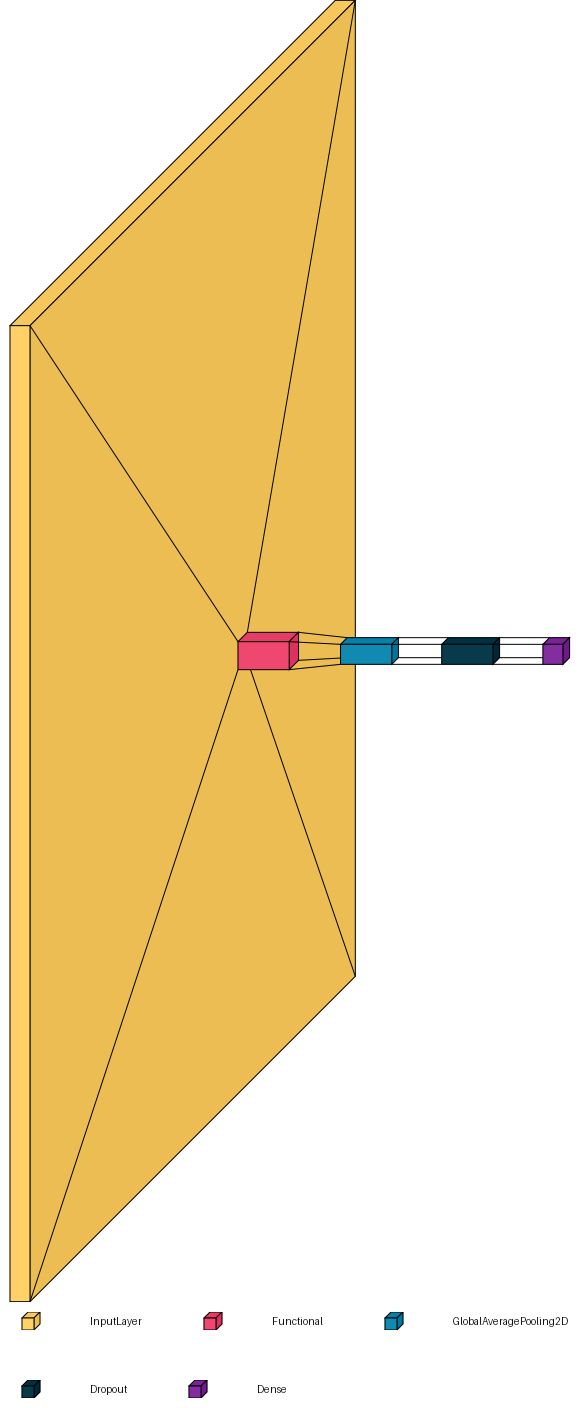

In [ ]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model,legend=True,spacing=50,background_fill = 'white')

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [ ]:
import tensorflow as tf


In [ ]:
epoch = 40
model.fit(train_ds, validation_data=val_ds, epochs=epoch,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=1e-2,
            patience=3,
            verbose=1,
            restore_best_weights=True
        )
    ]
)

Epoch 1/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.0788 - loss: 9.9401 - val_accuracy: 0.2757 - val_loss: 3.6958
Epoch 2/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - accuracy: 0.2661 - loss: 5.0203 - val_accuracy: 0.4000 - val_loss: 2.4756
Epoch 3/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 419ms/step - accuracy: 0.3943 - loss: 3.6605 - val_accuracy: 0.5243 - val_loss: 1.9044
Epoch 4/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 411ms/step - accuracy: 0.4496 - loss: 2.7751 - val_accuracy: 0.6162 - val_loss: 1.6283
Epoch 5/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 424ms/step - accuracy: 0.5449 - loss: 2.0147 - val_accuracy: 0.6324 - val_loss: 1.4682
Epoch 6/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 499ms/step - accuracy: 0.5864 - loss: 1.8942 - val_accuracy: 0.6649 - val_loss: 1.3962
Epoch 7/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 461ms/step - accuracy: 0.6328 - loss: 1.6063 - val_accuracy: 0.6811 - val_loss: 1.2453
Epoch 8/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 415ms/step - accuracy: 0.6161 - loss: 1.4295 - val_accuracy

In [ ]:
#fine tuning
base_model.trainable = True
for layer in base_model.layers[:14]:
    layer.trainable = False
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 244, 244,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 244, 244)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 244, 244)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 244, 244)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 244, 244,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 244, 244,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512)       │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 90)        │     46,170 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,853,200 (56.66 MB)

 Trainable params: 7,125,594 (27.18 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 92,342 (360.71 KB)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epoch = 40
history = model.fit(train_ds, validation_data=val_ds, epochs=epoch,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=1e-2,
            patience=3,
            verbose=1,
        )
    ]
)

Epoch 1/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 619ms/step - accuracy: 0.7672 - loss: 0.6659 - val_accuracy: 0.7838 - val_loss: 0.8003
Epoch 2/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 435ms/step - accuracy: 0.8708 - loss: 0.3412 - val_accuracy: 0.8216 - val_loss: 0.7447
Epoch 3/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 466ms/step - accuracy: 0.9550 - loss: 0.1595 - val_accuracy: 0.7946 - val_loss: 0.9105
Epoch 4/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 440ms/step - accuracy: 0.9574 - loss: 0.1578 - val_accuracy: 0.8270 - val_loss: 1.0582
Epoch 5/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 372ms/step - accuracy: 0.9715 - loss: 0.1007 - val_accuracy: 0.7946 - val_loss: 0.9476
Epoch 5: early stopping


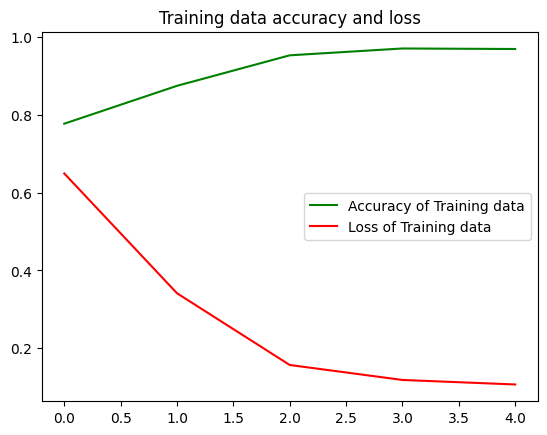

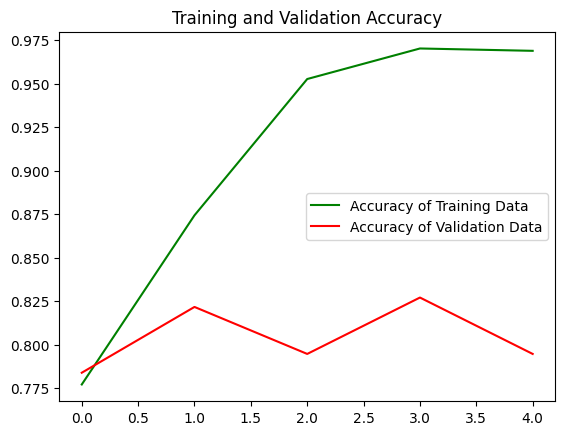

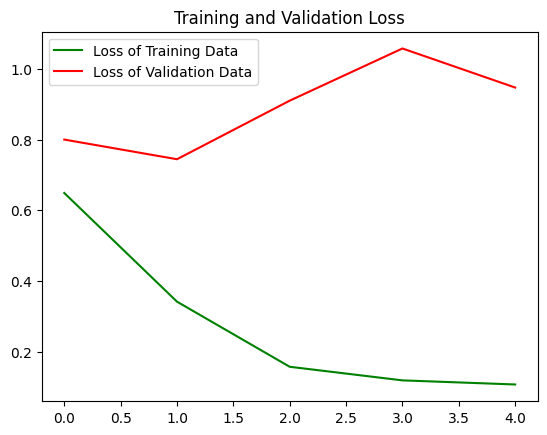

<Figure size 640x480 with 0 Axes>

In [ ]:
get_ac = history.history['accuracy']
get_los = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 543ms/step - accuracy: 0.8068 - loss: 0.8739
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


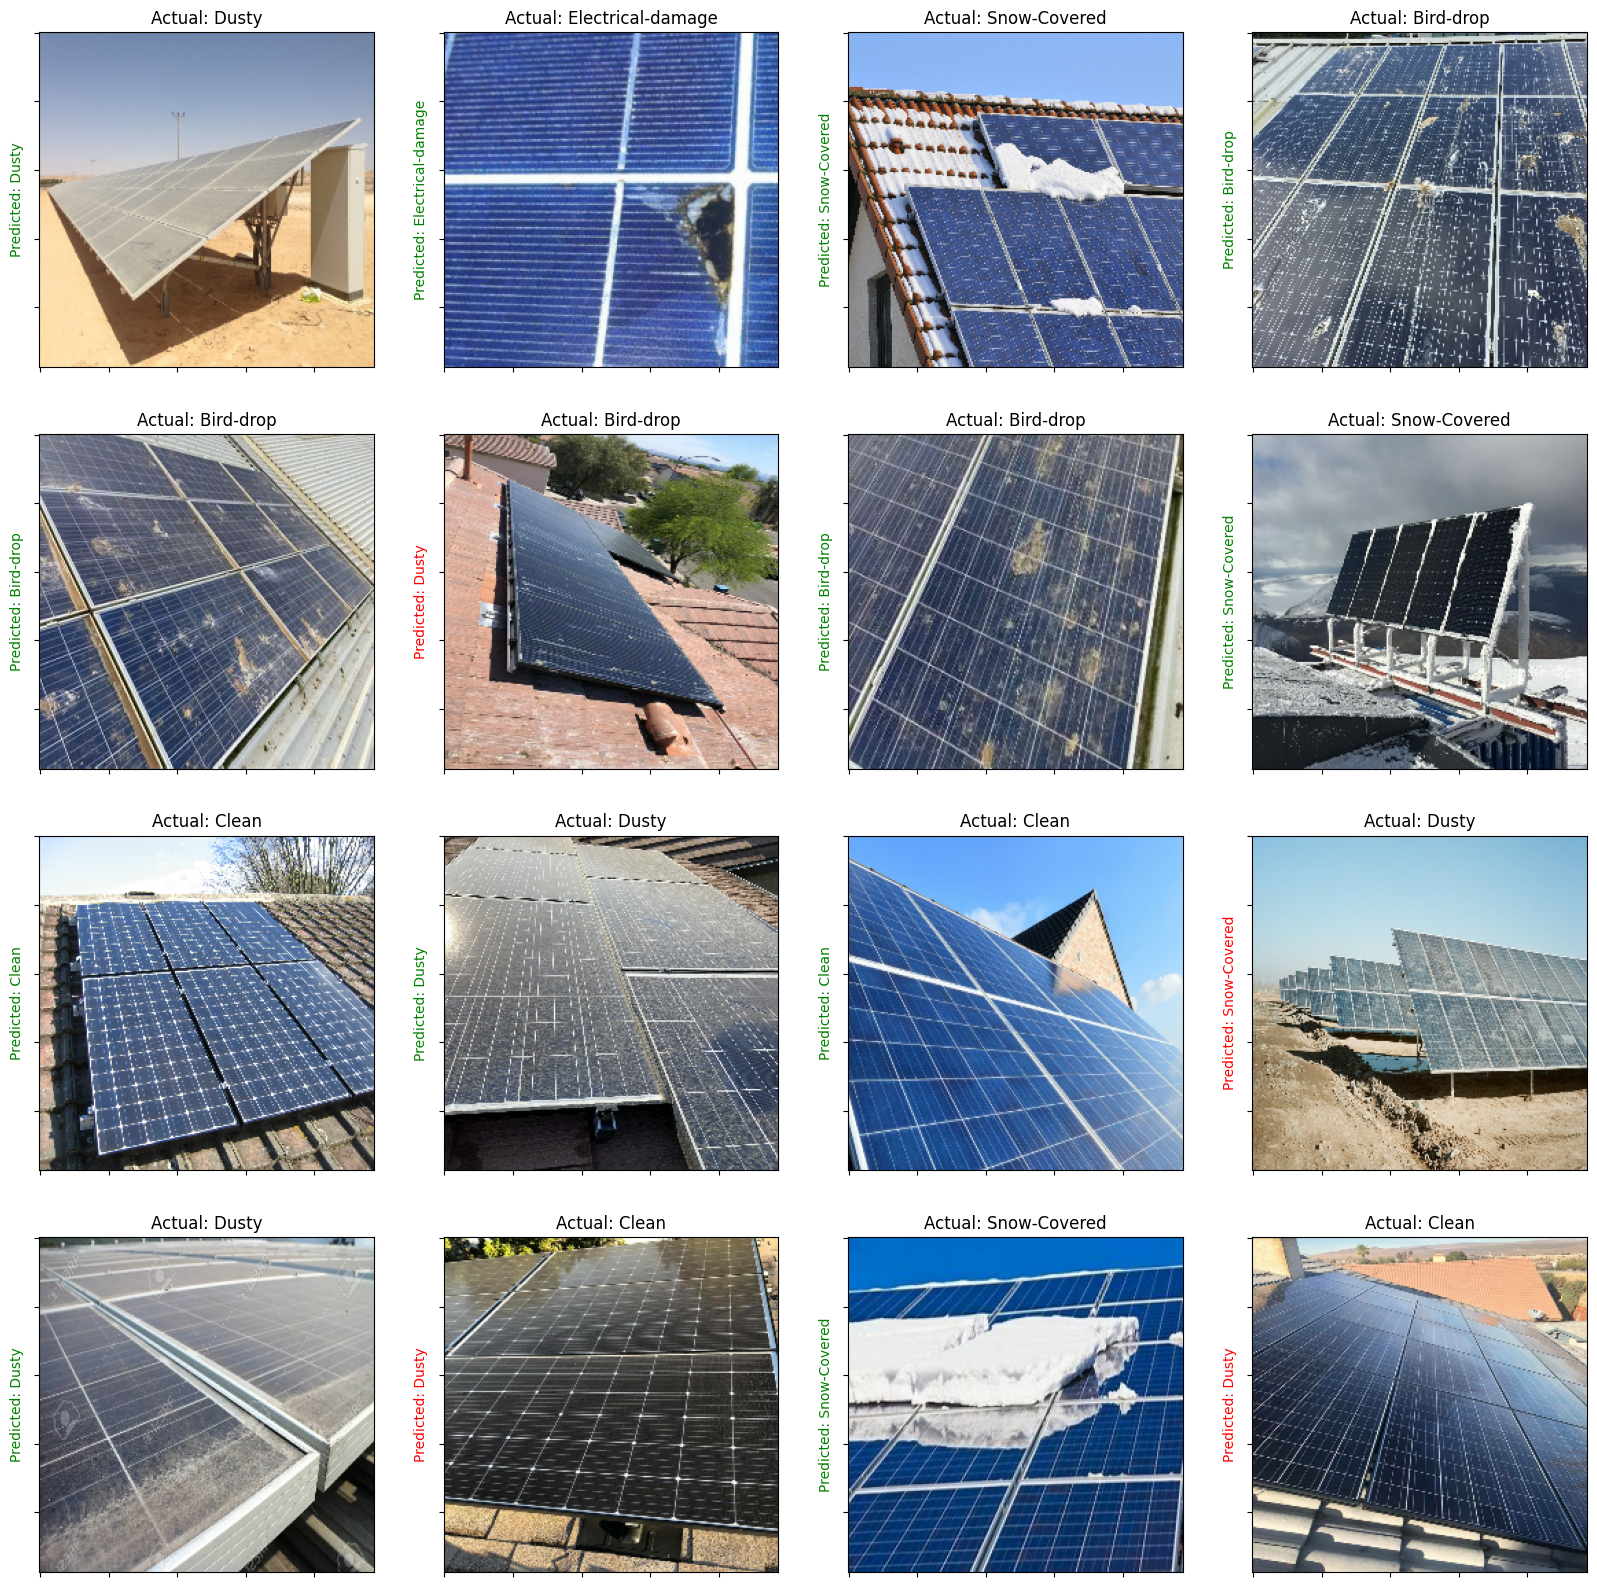

In [ ]:
oss, accuracy = model.evaluate(val_ds)

plt.figure(figsize=(20, 20))
for images, labels in val_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})

        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

In [ ]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])


In [ ]:
model = tf.keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    # your model layers here...
])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


TypeError: only integer scalar arrays can be converted to a scalar index

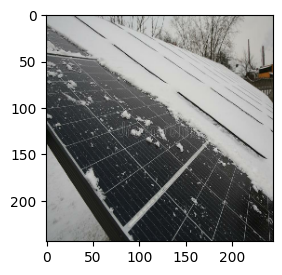

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class_names = train_ds.class_names

for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"True: {class_names[labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
        plt.axis("off")


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Set the image size (must match what the model expects)
img_height = 244
img_width = 244

# Path to the image you want to test
img_path = '/content/th.jpeg'  # <-- change to your image path

# Load and preprocess the image
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # add batch dimension

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# Get class names (assuming you still have them)
class_names = train_ds.class_names
print("Predicted class:", class_names[predicted_class])

# Show the image with prediction
plt.imshow(img)
plt.title(f"Prediction: {class_names[predicted_class]}")
plt.axis("off")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/th.jpeg'